In [1]:
from src.test_non_local_switching_non_stationary_model import load_data

is_ripple, spikes, position, speed, env, time = load_data(work_computer=False)


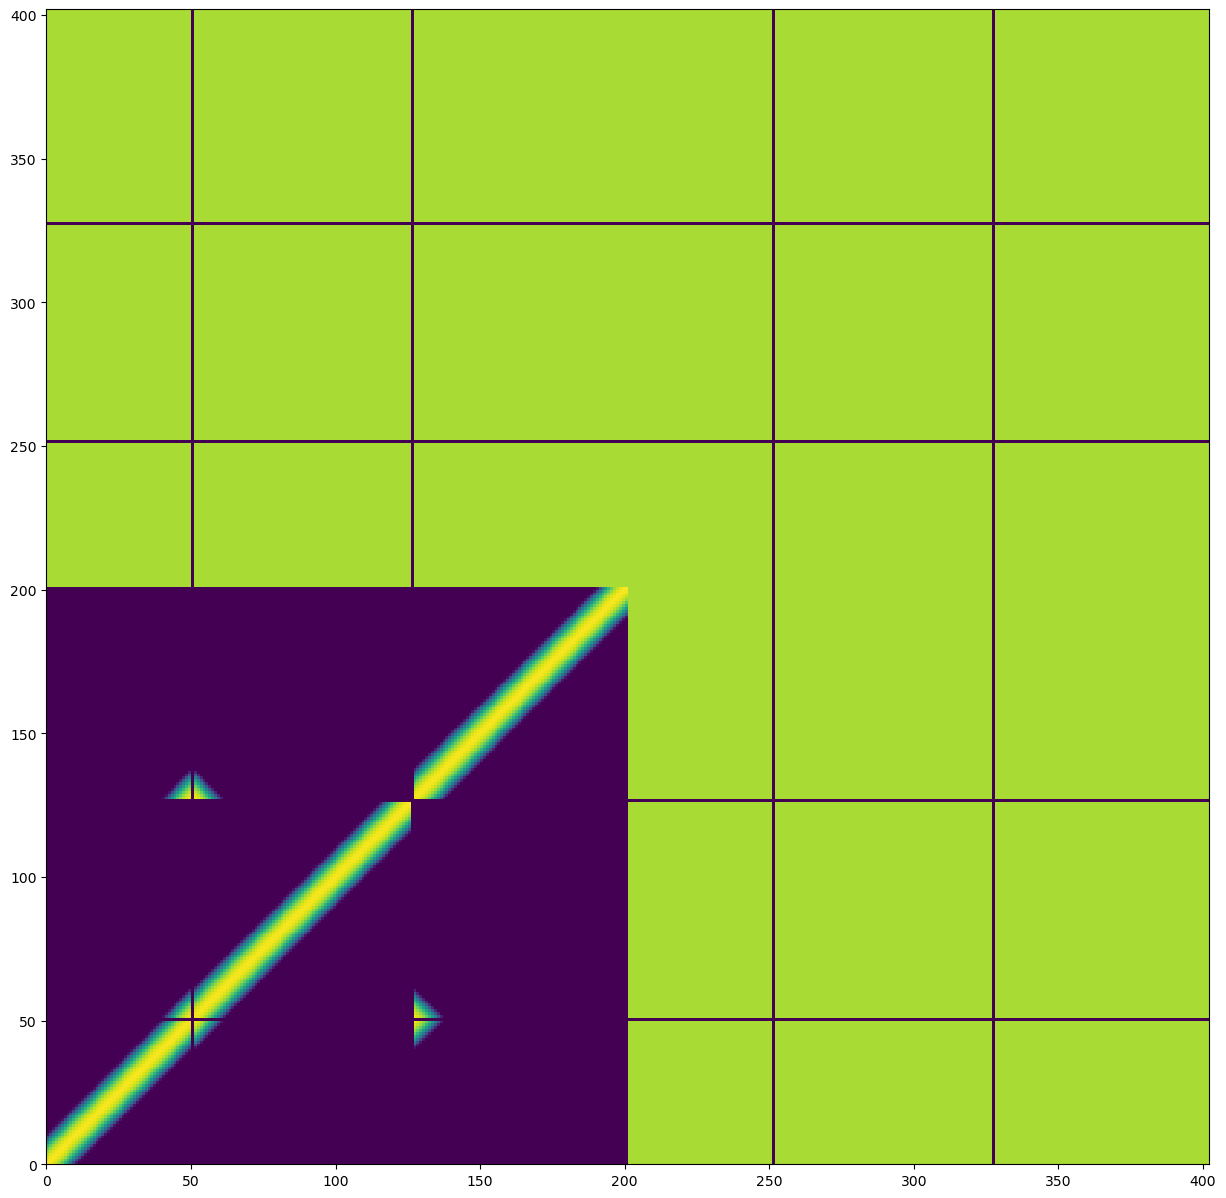

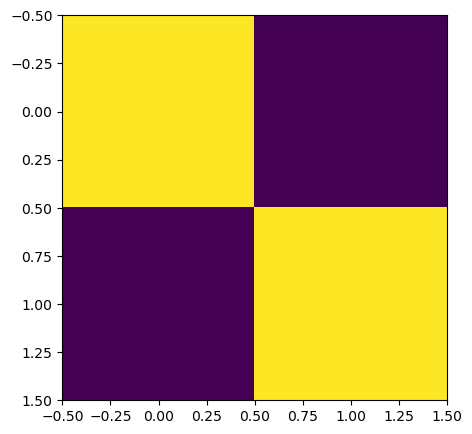

In [2]:
from src.test_contfrag_model import setup_contfrag_model


(
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    is_training,
    state_names,
) = setup_contfrag_model(
    is_ripple,
    position,
    env,
    emission_knot_spacing=8,
)


In [3]:
from src.test_contfrag_model import fit_contfrag_model

(
    predicted_state,
    acausal_posterior,
    acausal_state_probabilities,
    causal_posterior,
    marginal_log_likelihoods,
    initial_conditions,
    discrete_state_transitions,
    non_local_rates,
    log_likelihood,
) = fit_contfrag_model(
    spikes,
    emission_design_matrix,
    emission_predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    is_training,
    tolerance=1e-4,
    max_iter=20,
    fit_inital_conditions=True,
    fit_discrete_transition=True,
    stickiness=10.0,
)


Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1967458.607967898
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -1960852.0660788629, change: 6606.541889035143
Likelihoods
Expectation Step
Maximization Step
Stats
iteration 3, likelihood: -1960843.742756142, change: 8.323322720825672


In [4]:
discrete_state_transitions


array([[0.997848  , 0.002152  ],
       [0.08618765, 0.91381235]])

In [5]:
from src.test_non_local_switching_non_stationary_model import plot_switching_model
import numpy as np
import matplotlib.pyplot as plt

# non_local_rates = np.load("non_local_rates.npy")


def plot_contfrag_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    figsize=(20, 5),
    time_slice=None,
):
    if time_slice is None:
        time_slice = slice(0, len(time))

    _, axes = plt.subplots(4, 1, sharex=True, constrained_layout=True, figsize=figsize)

    sliced_time = time[time_slice]

    t, x = np.meshgrid(sliced_time, env.place_bin_centers_)

    neuron_sort_ind = np.argsort(
        env.place_bin_centers_[non_local_rates.argmax(axis=0)].squeeze()
    )
    spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice][:, neuron_sort_ind])

    axes[0].scatter(sliced_time[spike_time_ind], neuron_ind, s=1)
    h = axes[1].plot(sliced_time, acausal_state_probabilities[time_slice])
    axes[1].legend(h, state_names)

    n_states = len(state_names)
    posterior = np.zeros_like(acausal_posterior[time_slice, state_ind == 0])
    for ind in range(n_states):
        posterior += acausal_posterior[time_slice, state_ind == ind]

    axes[2].pcolormesh(
        t,
        x,
        posterior.T,
        vmin=0.0,
        vmax=0.01,
        cmap="bone_r",
    )
    axes[2].scatter(sliced_time, position[time_slice], s=1, color="magenta", zorder=2)
    axes[3].fill_between(sliced_time, speed[time_slice], color="lightgrey", zorder=2)
    plt.xlim((sliced_time.min(), sliced_time.max()))


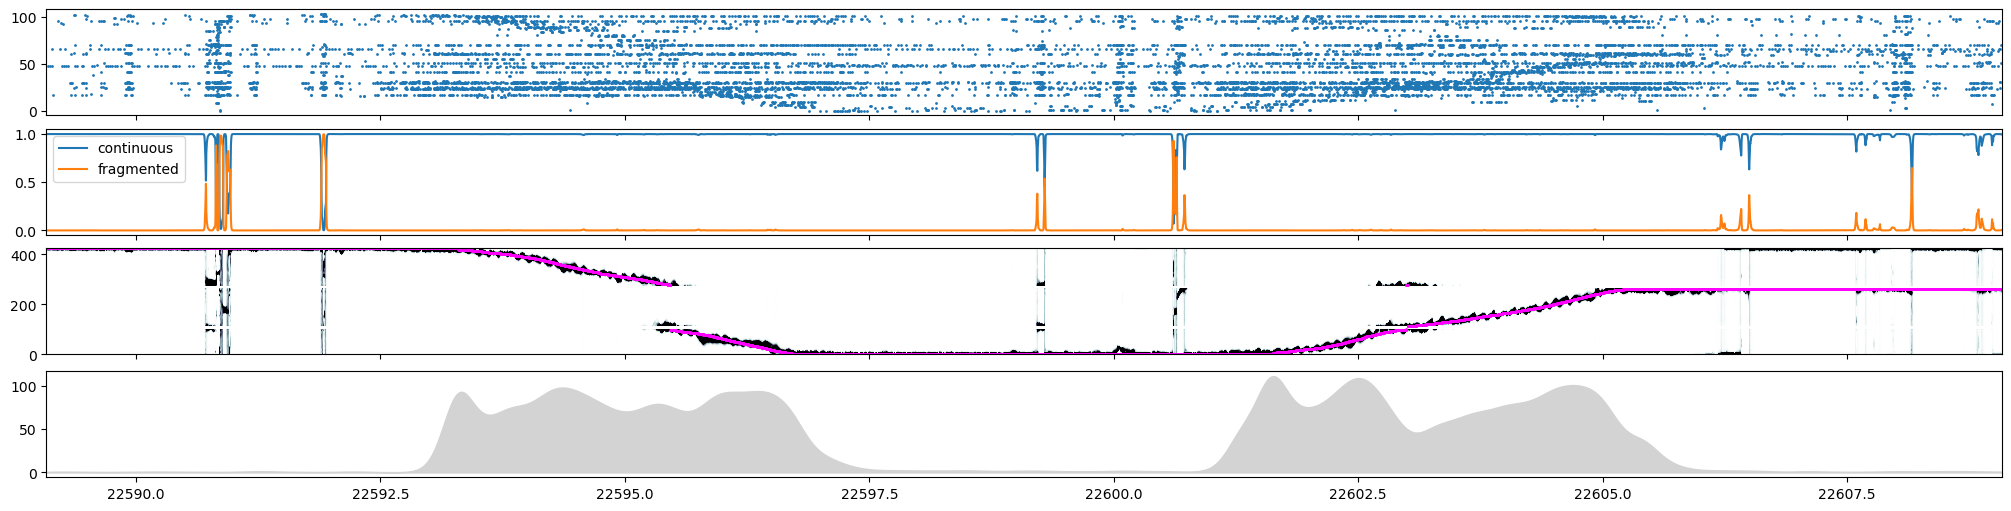

In [6]:
plot_contfrag_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    figsize=(20, 5),
    time_slice=slice(100_000, 110_000),
)


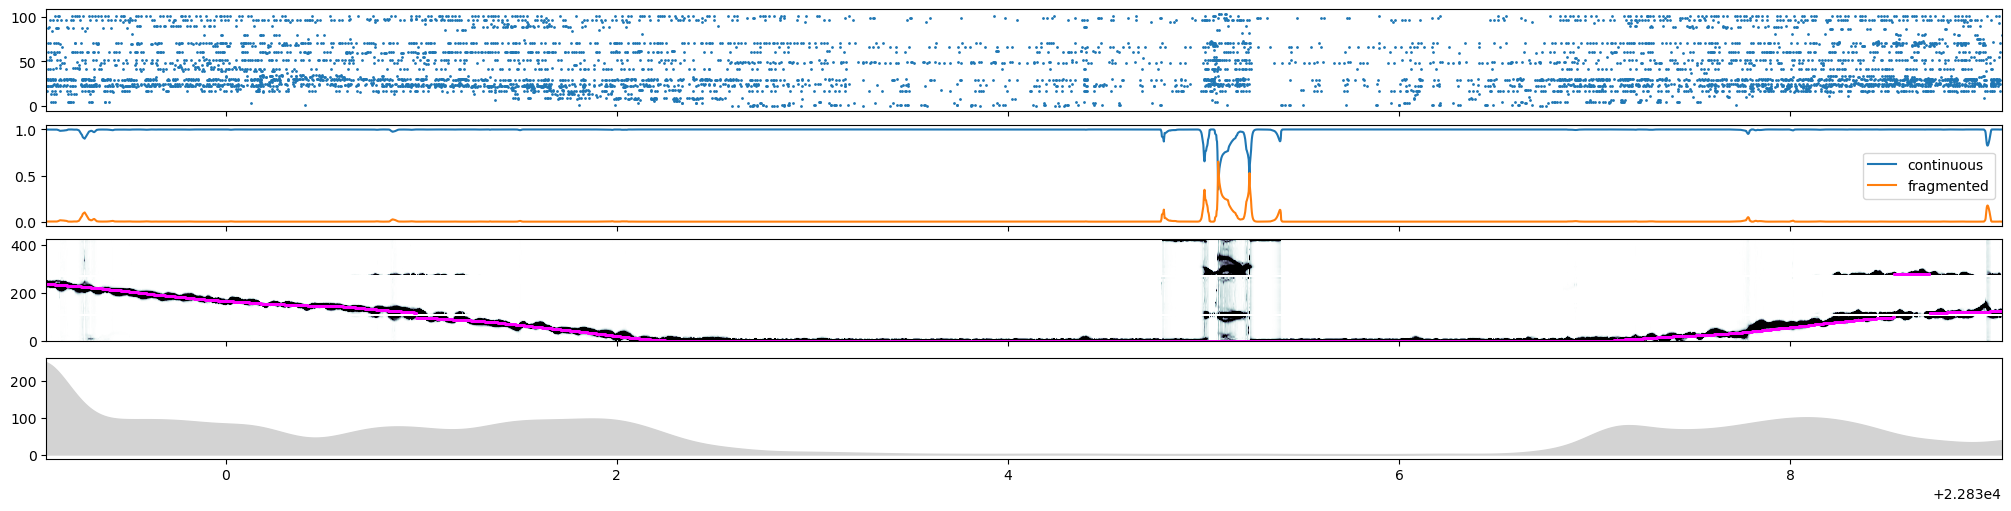

In [7]:
plot_contfrag_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    figsize=(20, 5),
    time_slice=slice(220_000, 225_000),
)

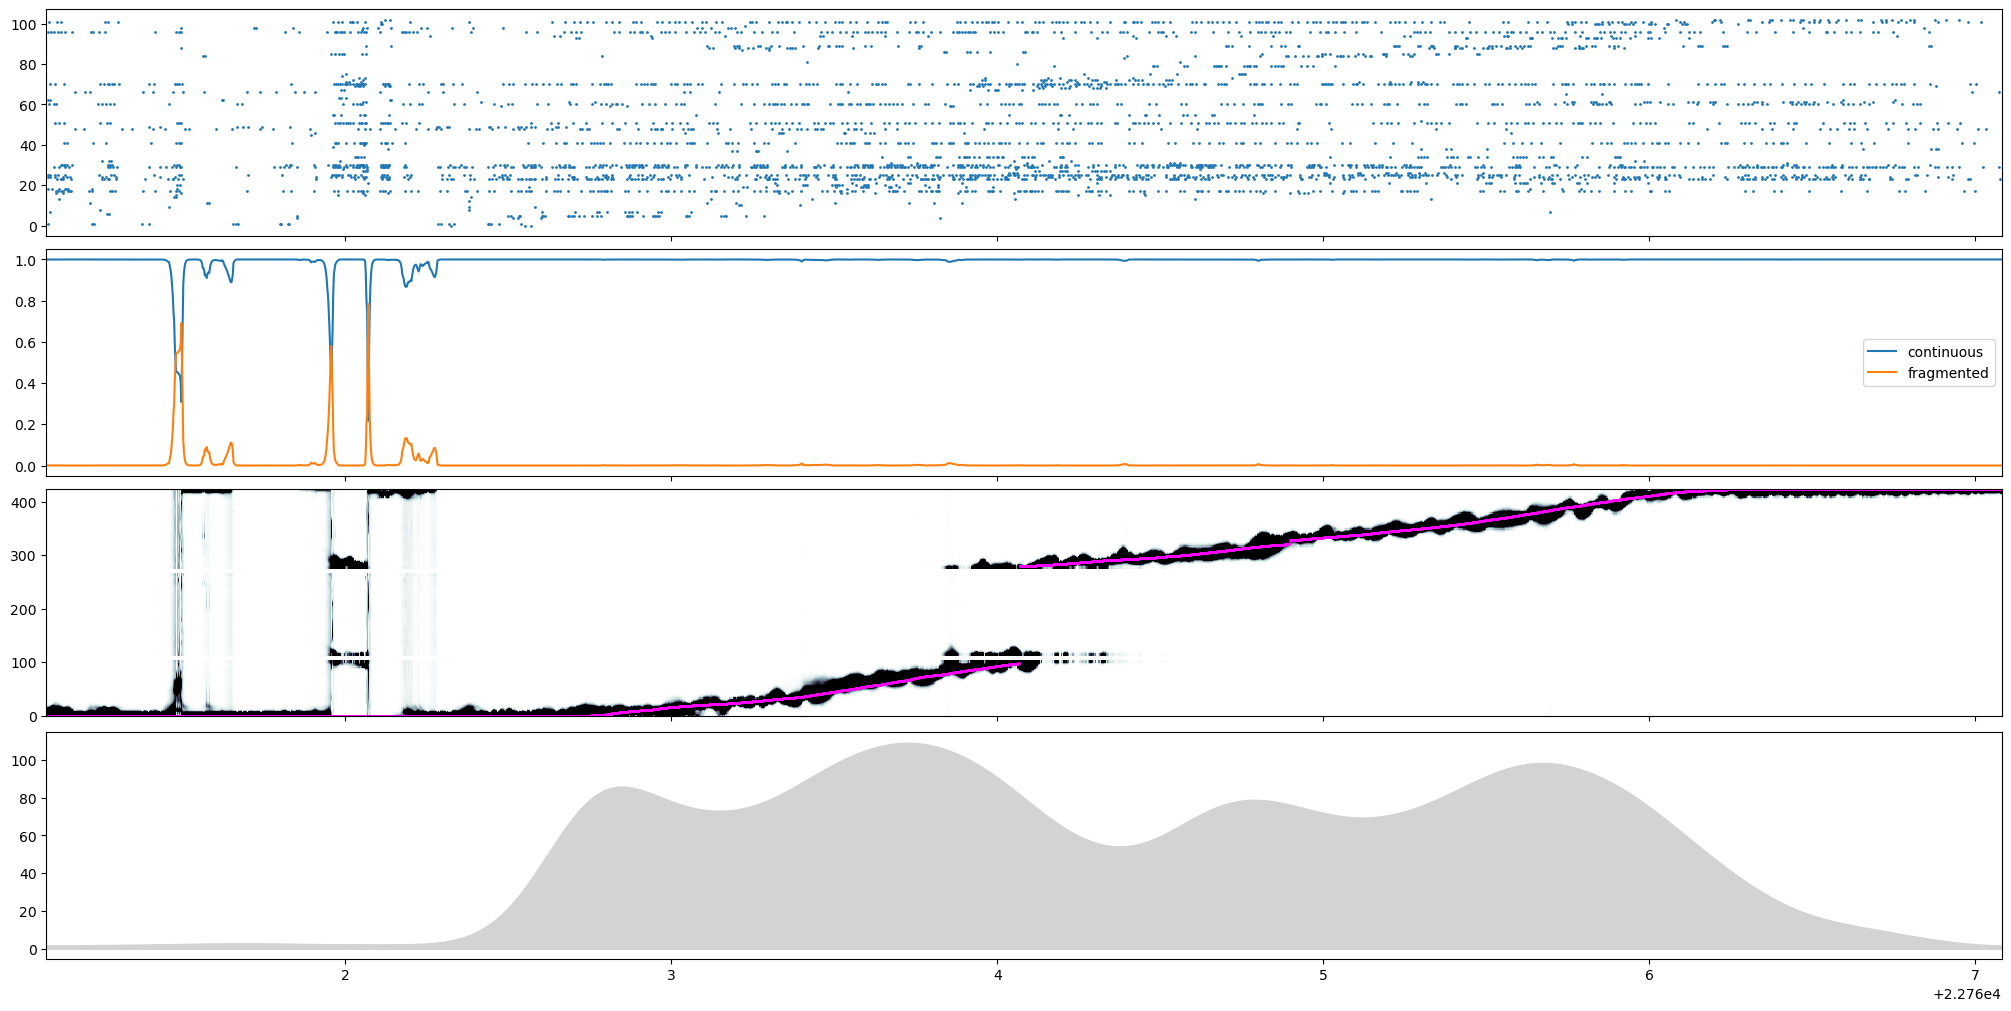

In [9]:
plot_contfrag_model(
    time,
    position,
    spikes,
    speed,
    non_local_rates,
    env,
    state_ind,
    acausal_state_probabilities,
    acausal_posterior,
    state_names,
    figsize=(20, 10),
    time_slice=slice(186_000, 189_000),
)